# Market Basket Analysis

Market Basket Analysis is performed on the [dataset](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery) of transactions from a bakery from 30th October 2016 to 9th April 2017.

Market basket analysis (MBA), also known as association-rule mining, is a useful method of discovering customer purchasing patterns by extracting associations or co-occurrences from stores' transactional databases (Chen et al., 2005). The technique predicts that if you buy a certain set of products, you are more(or less) likely to buy another associated set of products.

## Import libraries ##

In [1]:
# import the libraries required
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Exploring Data ##

In [3]:
# loading the data into dataframe and displaying the first 10 rows
bread = pd.read_csv("BreadBasket_DMS.csv")
print("Number of rows: {0}".format(len(bread)))
bread.head(10)

Number of rows: 21293


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


***Note:*** We observe the columns as Date, Time, Transaction Number and Item name. Our next step could be analysing the data fro more information

In [4]:
# checking the summary info of the dataframe
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


***Note:*** We observe that we have 21,293 rows and 4 columns, where all the data is non-null and there is no need to clean the data of null objects

In [5]:
# check for missing values
bread.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

There are no Null value in any of the columns, but there might be missing values denoted by "NaN, Null, none, Nil,0" etc. Lets us check for these 

***
## Check for Missing values ###

In [6]:
missing_value = [ "NaN","NONE", "None", "Nil", "nan", "none","nil", 0]
print("There are {0} missing values in the dataframe.".format(len(bread[bread.Item.isin(missing_value)])))
bread[bread.Item.isin(missing_value)].head(10)

There are 786 missing values in the dataframe.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


In [7]:
bread = bread.drop(bread[bread.Item == "NONE"].index)
print("Number of rows: {0}".format(len(bread)))
bread.head()

Number of rows: 20507


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


The number of deleted rows = 21293-20507 = 786. Which matches with our calculation

*We observe that the Date and Time are noted separately. We can use Datetime by Pandas and convert it to datetime64 type, for easily performing operations on these values*

In [8]:
bread['Datetime'] = pd.to_datetime(bread['Date']+' '+bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head(10)

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam
2016-10-30 10:07:57,3,Cookies
2016-10-30 10:08:41,4,Muffin
2016-10-30 10:13:03,5,Coffee
2016-10-30 10:13:03,5,Pastry


## Delving deep into the data 

In [9]:
tot_items = len(bread)
tot_days = len(np.unique(bread.index.date))
tot_months = len(np.unique(bread.index.month))
avg_items = tot_items / tot_days
unique_items = bread.Item.unique().size

print("There are {} unique items sold by the bakery".format(unique_items))
print("Total {} items sold in {} days in {} months".format(tot_items,tot_days,tot_months))
print("With an average of {: .2f} items sold per day".format(avg_items))

There are 94 unique items sold by the bakery
Total 20507 items sold in 159 days in 7 months
With an average of  128.97 items sold per day


## Data Visualisation ##

In [10]:
bread.Item.value_counts(normalize = True)[:10]

Coffee           0.266787
Bread            0.162140
Tea              0.069976
Cake             0.049983
Pastry           0.041742
Sandwich         0.037597
Medialuna        0.030039
Hot chocolate    0.028771
Cookies          0.026332
Brownie          0.018481
Name: Item, dtype: float64

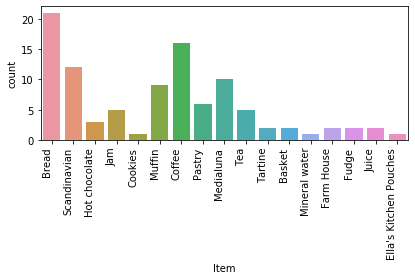

In [11]:
ax = sns.countplot(x='Item',data=bread.head(100))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

**Note** We created a count plot of the first 200 items in the dataset to see the popularity of these items 

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Item')]

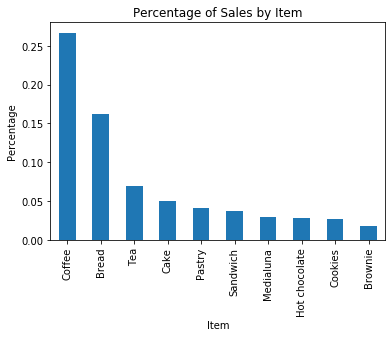

In [12]:
bread['Item'].value_counts(normalize = True)[:10].plot(kind="bar",title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

***Note:*** We can infer that Coffee sells the most(26%), followed by Bread(16%) and Tea(7%)

[Text(0, 0.5, 'Total Number'), Text(0.5, 0, 'Item')]

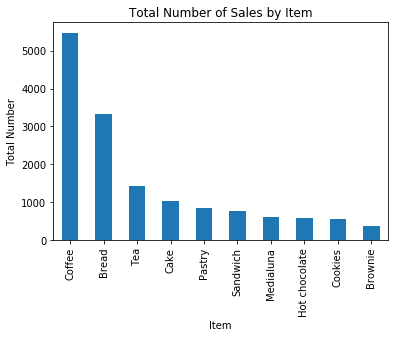

In [13]:
bread['Item'].value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

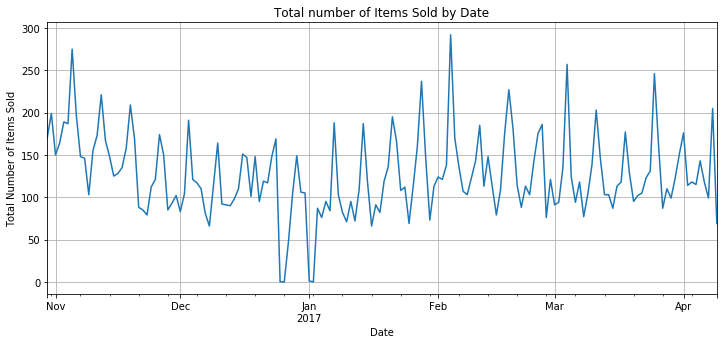

In [14]:
bread['Item'].resample('D').count().plot(figsize=(12,5),grid=True,title="Total number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

*The data is resampled day wise, showing a fluctuating number of items sold everyday*

In [15]:
bread["Item"].resample("M").count()

Datetime
2016-10-31     369
2016-11-30    4436
2016-12-31    3339
2017-01-31    3356
2017-02-28    3906
2017-03-31    3944
2017-04-30    1157
Freq: M, Name: Item, dtype: int64

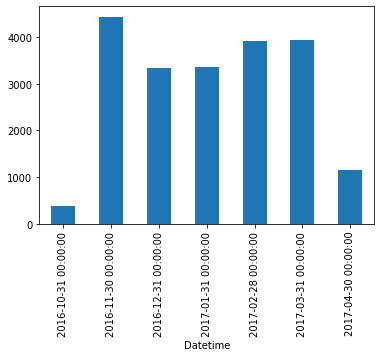

In [16]:
bread["Item"].resample("M").count().plot(kind='bar')

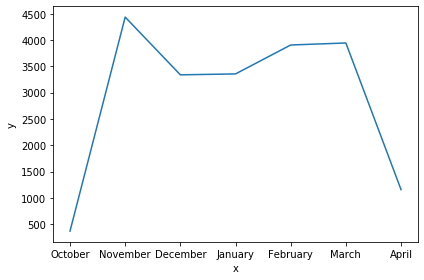

In [17]:
x=['October','November','December','January','February','March','April']
y=bread["Item"].resample("M").count()
plt.plot(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.tight_layout()  
plt.show() 

*The data is sampled month wise showing the frequency of transactions per month recorded in the dataset. We can infer that the most number of items are sold in the month of November. However please note that the data for the months of October and April is not complete*

In [18]:
# extract hour of the day and weekday of the week
# For Datetimeindex, the day of the week with Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday + 1

bread.head(10)

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
2016-10-30 10:07:57,3,Cookies,10,7
2016-10-30 10:08:41,4,Muffin,10,7
2016-10-30 10:13:03,5,Coffee,10,7
2016-10-30 10:13:03,5,Pastry,10,7


In [19]:
bread_groupby_hr = bread.groupby('Hour').agg({'Item': lambda item: item.count()/tot_days})
bread_groupby_hr

,Item
Hour,
1,0.006289
7,0.150943
8,4.056604
9,12.364780
10,16.767296
11,19.509434
12,17.949686
13,16.459119
14,16.603774


[Text(0, 0.5, 'Average Number of Items Sold'),
 Text(0.5, 0, 'Hour of the Day (24 hour time)')]

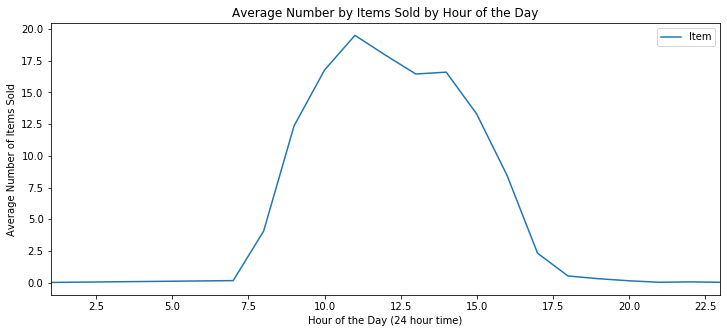

In [20]:
# plot the chart
bread_groupby_hr.plot(y="Item", figsize=(12,5), title="Average Number by Items Sold by Hour of the Day").set(xlabel="Hour of the Day (24 hour time)", ylabel="Average Number of Items Sold")

We observe that the sales pick up from 8am and reaches its peak at around 11am and slows down starting from 2pm

In [22]:
#sales by day of the week
bread_groupby_wkdy = bread.groupby("Weekday").agg({"Item": lambda item:item.count()})
bread_groupby_wkdy

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124
6,4605
7,3095


In [24]:
#Calculating average items per weekday

import datetime
daterange = pd.date_range(datetime.date(2016,10,30),datetime.date(2017,4,9))
monday=0
tuesday=0
wednesday=0
thursday=0
friday=0
saturday=0
sunday=0

for day in np.unique(bread.index.date):
    if day.isoweekday() ==1:
        monday += 1
    elif day.isoweekday() ==2:
        tuesday += 1
    elif day.isoweekday() ==3:
        wednesday += 1
    elif day.isoweekday() ==4:
        thursday += 1
    elif day.isoweekday() ==5:
        friday += 1
    elif day.isoweekday() ==6:
        saturday += 1
    elif day.isoweekday() ==7:
        sunday += 1
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday
print("Monday = {0}, Tuesday = {1}, Wednesday = {2}, Thursday = {3}, Friday = {4}, Saturday = {5}, Sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

Monday = 21, Tuesday = 23, Wednesday = 23, Thursday = 23, Friday = 23, Saturday = 23, Sunday = 23, total = 159


In [25]:
#Now calcullating average items for each weekday
conditions = [
    (bread_groupby_wkdy.index == 1),
    (bread_groupby_wkdy.index == 2),
    (bread_groupby_wkdy.index == 3),
    (bread_groupby_wkdy.index == 4),
    (bread_groupby_wkdy.index == 5),
    (bread_groupby_wkdy.index == 6),
    (bread_groupby_wkdy.index == 7)]
choices = [bread_groupby_wkdy.Item/21, bread_groupby_wkdy.Item/23, bread_groupby_wkdy.Item/23, bread_groupby_wkdy.Item/23, bread_groupby_wkdy.Item/23, bread_groupby_wkdy.Item/23, bread_groupby_wkdy.Item/23]

bread_groupby_wkdy["Average"] = np.select(conditions, choices, default=0)
bread_groupby_wkdy

,Item,Average
Weekday,,
1,2324,110.666667
2,2392,104.000000
3,2321,100.913043
4,2646,115.043478
5,3124,135.826087
6,4605,200.217391
7,3095,134.565217


[Text(0, 0.5, 'Average Number of Items Sold'),
 Text(0.5, 0, 'Day of the Week (1=Monday, 7=Sunday)')]

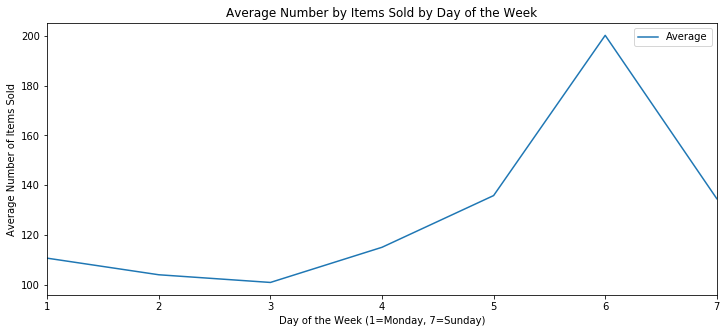

In [26]:
bread_groupby_wkdy.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")

***Note:*** It is observed that Saturday is the busiest day of the week where the average sales touch 200 items, while Wednesday is the dullest day with sales touching around 100 items. 

## One-Hot encoding
The **Apriori** function in the MLxtend library expects data in a one-hot encoded pandas DataFrame. This means that all the data for a transaction must be included in one row and the items must be one-hot encoded. Example below:

In [27]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df.head()

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [28]:
basket = (df.groupby(['Transaction','Item'])['Count']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Transaction'))
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
basket[basket.Coffee == 4].iloc[:,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
6850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


**Note:** At this stage, the one-hot encoded table shows the count of items purchased as result. If you observe the portion of the table above, in Transaction 6887, the cell value for Coffee is "4.0" because there were 4 coffee purchased in this transaction. However, this is not important for us and we need to convert this value into 1.

In [30]:
#converting values above 1 to 1
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [34]:
basket_sets = basket.applymap(encode)
basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
basket_sets[basket_sets.Coffee == 1].iloc[3142:3145,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6884,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6885,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6887,0,1,0,0,0,0,0,0,0,1,0,0,0,0


**Note:** After applying the encoding function, for the same Transaction 6887, the cell value for Coffee has become "1" which is what we need for the **Apriori** function.

## Generating Frequent Item set

Now, we are ready to generate the frequent item sets. We will set the minimum-support threshold at 1%

In [38]:
frequent_itemsets = apriori(basket_sets,min_support = 0.01,use_colnames=True)

## Generate Association Rules

The final step is to generate the rules with their corresponding support, confidence and lift. We will set the minimum threshold for lift at 1 and then sort the result by descending confidence value.

In [42]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.sort_values("confidence",ascending=False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


# Inference

The result shows the Top 10 itemsets sorted in descending order by confidence value with all itemsets having a support value > 1% and lift value > 1.

For example, the first itemset shows the association: "If Toast then Coffee" with suport vlue at 0.02366 i.e around 2.4% of all transactions have this combination. The confidence value is 0.704403 i.e we have 70.44% confidence that Coffee sales happen whenever Toast is purchased. The lift value is 1.47 (>1) which shows that the purchase of Coffee is more influenced by the purchase of Toast rather than Coffee's purchase being independent of Toast purchase. The lift value 1.47 shows that the sale of Toast lifts the coffee sales by 1.47 times

# References

[1] Repository: https://github.com/limchiahooi/market-basket-analysis
<br>
[2] Dataset: https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery <br>
[3] Python for Data Science and Machine Learning: https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/